In [1]:
import numpy as np
import scipy.interpolate as interp

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

# SF 260 Stabilizzatore: calcolo carichi

In [3]:
select_manovra = False

In [4]:
x_tot = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.199,1.201, 1.35, 1.5])
if select_manovra:
    Ty_tot = np.array([-293.04, -254.92, -220.02, -188.35, -159.91, -134.7, -112.71, -26.94, -12.56, 0.0])
    Mx_tot = np.array([-235.69, -180.95, -133.52, -92.73, -57.95, -28.55, -3.86, -3.86, -0.92, 0.0])
    Mz_tot = np.array([30.53, 22.43, 15.64, 10.04, 5.53, 1.98, -0.72, 2.71, 1.18, 0])
    tipo = 'manovra'
else:
    Ty_tot = np.array([-274.86, -227.55, -184.24, -144.94, -109.64, -78.34, -51.05, -33.43, -10.14, 0.0])
    Mx_tot = np.array([-185.92, -137.75, -94.63, -61.78, -36.39, -17.66, -4.79, -4.79, -1.14, 0.0])
    Mz_tot = np.array([84.99, 64.54, 47.4, 33.29, 21.9, 12.95, 6.14, 6.84, 2.97, 0])
    tipo = 'raffica'    

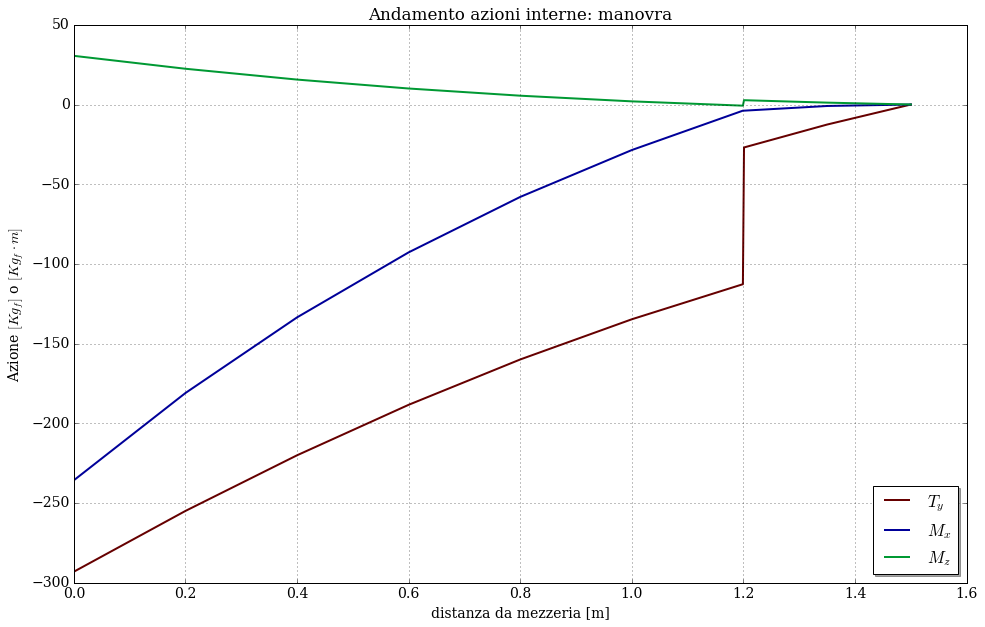

In [5]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(x_tot,Ty_tot,lw=2.0,color=(0.4,0,0),label=r'$T_y$')
plt.plot(x_tot,Mx_tot,lw=2.0,color=(0.0,0,0.6),label=r'$M_x$')
plt.plot(x_tot,Mz_tot,lw=2.0,color=(0.0,0.6,0.2),label=r'$M_z$')
plt.legend(loc='lower right', shadow=True);
plt.title('Andamento azioni interne: '+tipo)
plt.xlabel('distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f]$ o $[Kg_f\cdot m]$')
plt.grid();
plt.savefig('01_dati_'+tipo+'.jpg')

# Carichi

In [6]:
Cload = Ty_tot[6] - Ty_tot[7]
Mload = Mz_tot[6] - Mz_tot[7]

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.35, 1.5])

Ty = np.zeros(len(Ty_tot)-1)
Mx = np.zeros(len(Mx_tot)-1)
Mz = np.zeros(len(Mz_tot)-1)


Ty[-2:] = Ty_tot[-2:]
Ty[:7] = Ty_tot[:7]-Cload

Mx[-2:] = Mx_tot[-2:]
Mx[:7] = Mx_tot[:7]-Cload*(1.2-x[:7])

Mz[-2:] = Mz_tot[-2:]
Mz[:7] = Mz_tot[:7]-Mload


# Carichi distribuiti

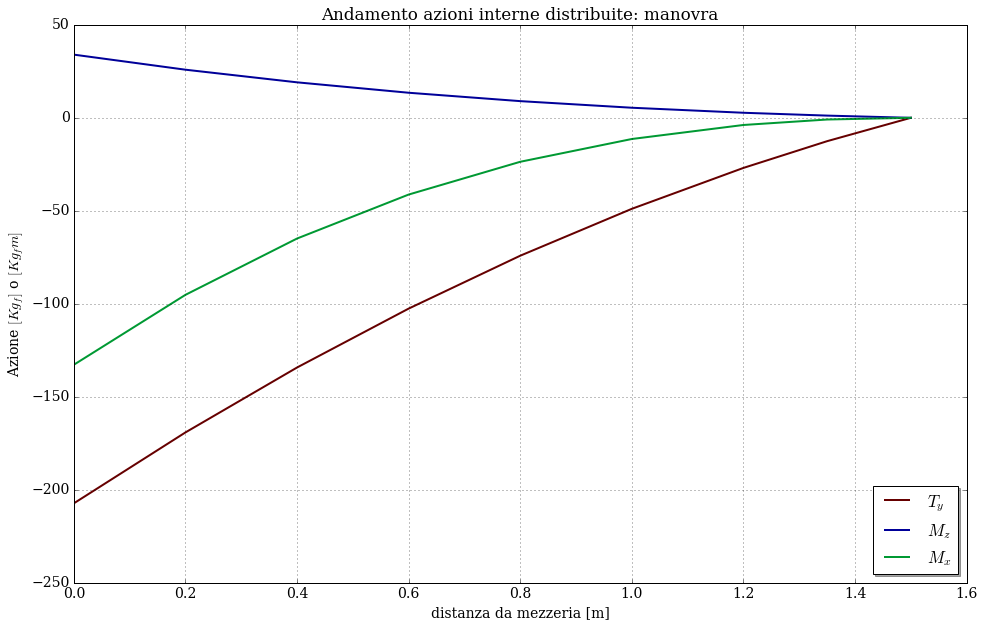

In [7]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(x,Ty,lw=2.0,color=(0.4,0,0),label=r'$T_y$')
plt.plot(x,Mz,lw=2.0,color=(0.0,0,0.6),label=r'$M_z$')
plt.plot(x,Mx,lw=2.0,color=(0.0,0.6,0.2),label=r'$M_x$')
plt.legend(loc='lower right', shadow=True);
plt.title('Andamento azioni interne distribuite: '+tipo)
plt.xlabel('distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f]$ o $[Kg_f m]$')
plt.grid();
plt.savefig('02_azioni_distribuite_'+tipo+'.jpg')

# Carico concentrato da equilibratore

In [8]:
print "Carico concentrato:" + str(Cload)
print "Momento concentrato: "+str(Mload)
print "braccio:" +str(Mload/Cload*1000) + " [mm]"

Carico concentrato:-85.77
Momento concentrato: -3.43
braccio:39.9906727294 [mm]


In [9]:
Cload_N = Cload*9.81
print Cload_N

-841.4037


# 1) Calcolo carichi sulle centine

In [10]:
x1 = 1.5 - x
fTy = interp.interp1d(x,Ty,kind='quadratic')

In [11]:
xx = np.linspace(0.0,1.5,num=250,endpoint=True)
Ty1 = fTy(xx)
intTy = np.zeros_like(xx)

for i in range(1,len(intTy)):
    intTy[i] = np.trapz(Ty1[:i],xx[:i])

intTy = intTy[-1] - intTy

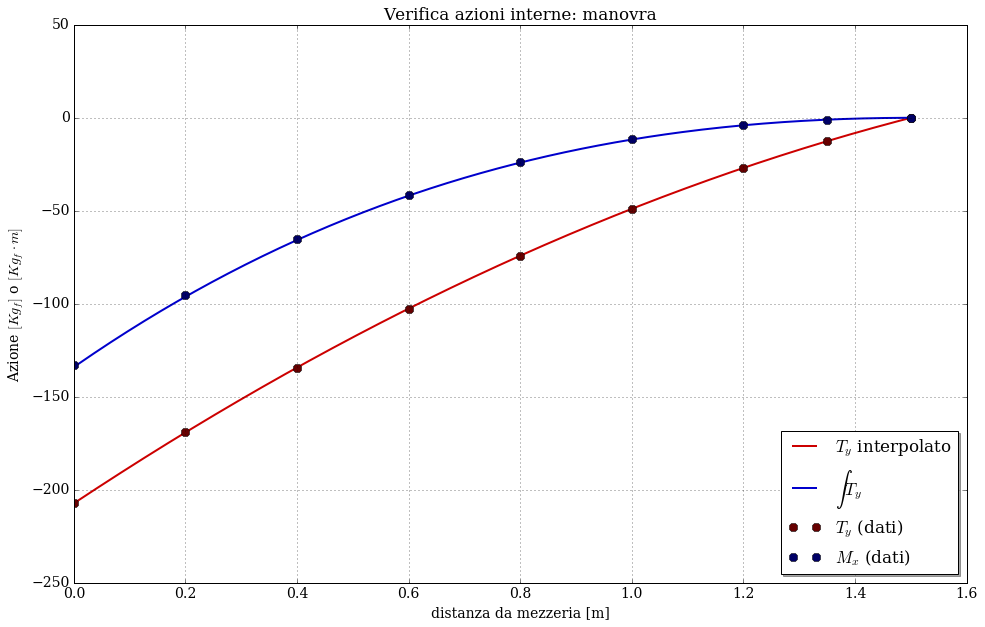

In [12]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(xx,Ty1,lw=2.0,color=(0.8,0,0),label=r'$T_y$ interpolato')
plt.plot(xx,intTy,lw=2.0,color=(0.0,0,0.8),label=r'$\int T_y$')
plt.plot(x,Ty, '8',color=(0.4,0,0), ms=8,label=r'$T_y$ (dati)')
plt.plot(x,Mx, '8',color=(0.0,0,0.4), ms=8,label=r'$M_x$ (dati)')
plt.title('Verifica azioni interne: '+tipo)
plt.xlabel('distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f]$ o $[Kg_f \cdot m]$')
plt.grid()
plt.legend(loc='lower right', shadow=True);
plt.savefig('03_verifica_'+tipo+'.jpg')

# Centine

In [13]:
# pos centine
xc = np.array([.112, .410, .740, 1.070, 1.400])
# pos pti integrazione
xm = np.zeros_like(xc)

for i in range(len(xc)-1):
    xm[i+1] = (xc[i+1]+xc[i])*.5


In [14]:
Tyc = fTy(xm)

In [15]:
xc_ext = np.zeros(len(xc)+2)
xc_ext[1:-1] = xc
xc_ext[-1] = 1.5
Tyc_ext = np.zeros(len(xc)+2)
Tyc_ext[1:-1] = Tyc
Tyc_ext[0] = Tyc_ext[1]

fTyc = interp.interp1d(1.5-xc_ext[::-1],Tyc_ext[::-1],'zero')
Ty1c = fTyc(1.5 - xx)

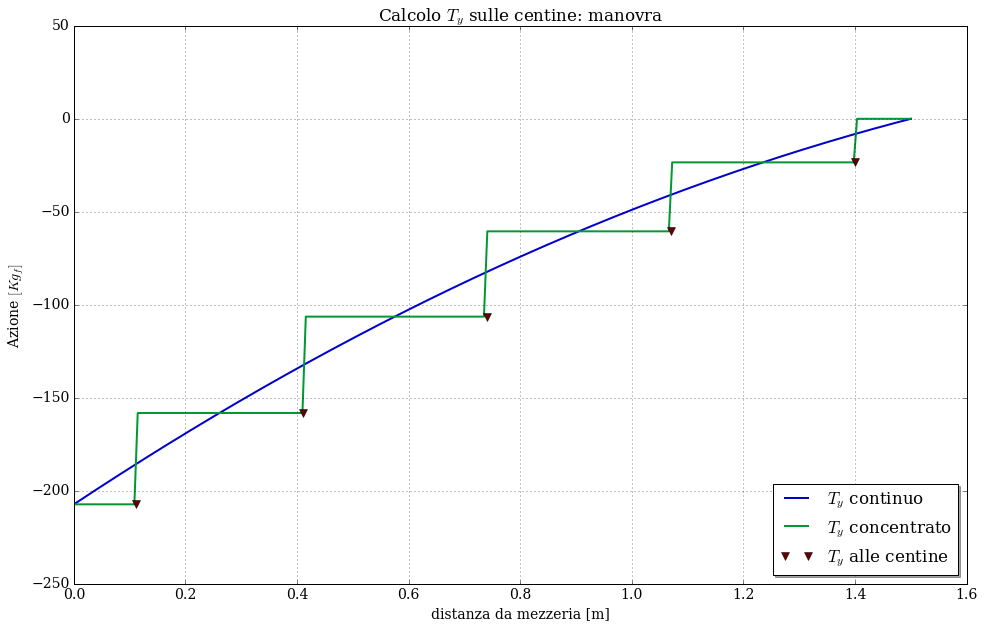

In [16]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(xx,Ty1,lw=2.0,color=(0.0,0,0.8),label=r'$T_y$ continuo')
plt.plot(xx,Ty1c,lw=2.0,color=(0.0,0.6,0.2),label=r'$T_y$ concentrato')
#plt.plot(xx,intTy,label=r'$\int T_y$')
plt.plot(xc,Tyc, 'v',color=(0.4,0,0), ms=8,label=r'$T_y$ alle centine')
#plt.plot(x,Mx, '8', ms=8,label=r'$M_x$')
plt.title(r'Calcolo $T_y$ sulle centine: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f]$')
plt.grid()
plt.legend(loc='lower right', shadow=True);
plt.savefig('04_Ty_centine_'+tipo+'.jpg')

# Forze sulle centine

In [17]:
Fc = np.zeros_like(Tyc)
Fc[-1] = Tyc[-1]

for i in reversed(range(len(Tyc)-1)):
    Fc[i] = Tyc[i]-Tyc[i+1]
Fc

array([-49.10692282, -51.80092487, -45.86004505, -37.0799532 , -23.42215405])

In [18]:
Fc_N = Fc*9.81
print Fc_N

[-481.7389129  -508.167073   -449.88704195 -363.75434094 -229.77133121]


# Mx

In [19]:
intTyc = np.zeros_like(xx)

for i in range(1,len(intTyc)):
    intTyc[i] = np.trapz(Ty1c[:i],xx[:i])

intTyc = intTyc[-1] - intTyc

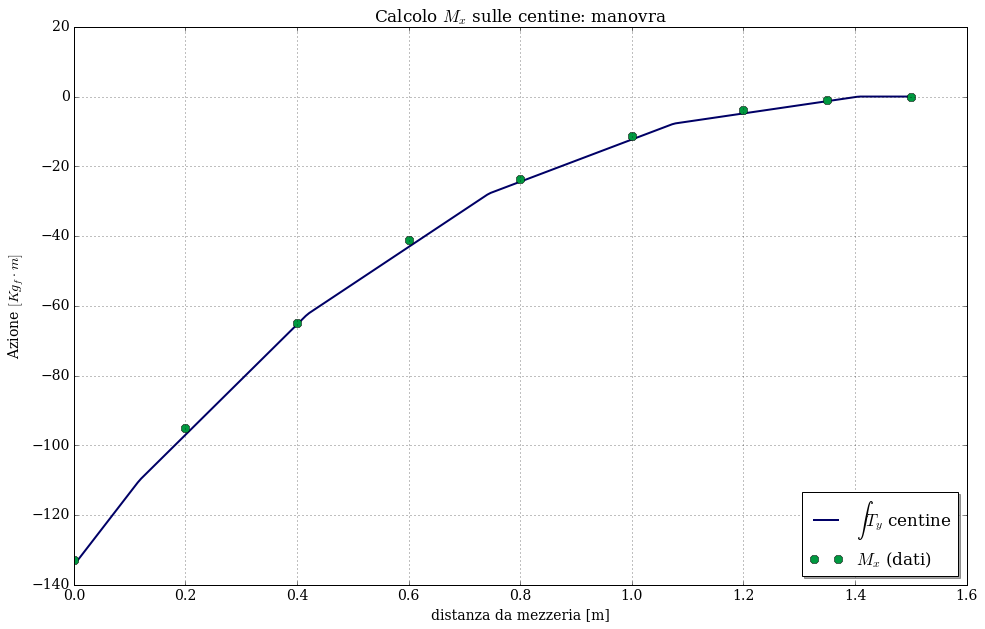

In [41]:
plt.figure(figsize=(16,10), dpi=300)
#plt.plot(xx,Ty1,label=r'$T_y$ interp')
plt.plot(xx,intTyc,lw=2.0,color=(0.0,0,0.4),label=r'$\int T_y$ centine')
#plt.plot(x,Ty, '8', ms=8,label=r'$T_y$')
plt.plot(x,Mx, '8',color=(0.0,0.6,0.25), ms=8,label=r'$M_x$ (dati)')
plt.title(r'Calcolo $M_x$ sulle centine: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f \cdot m]$')
plt.grid()
plt.ylim((-140,20))
plt.legend(loc='lower right', shadow=True);
plt.savefig('05_Mx_centine_'+tipo+'.jpg')

# Mz

In [21]:
fMz = interp.interp1d(x,Mz,kind='quadratic')
Mzc = fMz(xm)

Mzc_ext = np.zeros(len(xc)+2)
Mzc_ext[1:-1] = Mzc
Mzc_ext[0] = Mzc_ext[1]

fMzc = interp.interp1d(1.5-xc_ext[::-1],Mzc_ext[::-1],'zero')
Mz1c = fMzc(1.5 - xx)

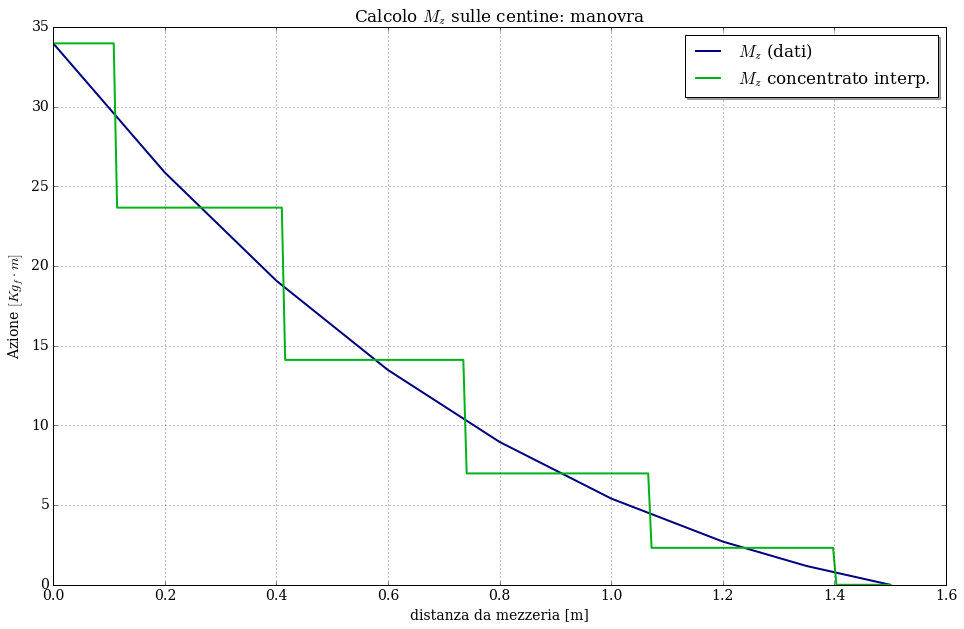

In [22]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(x,Mz,color=(0.0,0,0.5),lw=2.0,label=r'$M_z$ (dati)')
plt.plot(xx,Mz1c,color=(0.0,0.7,0.1),lw=2.0,label=r'$M_z$ concentrato interp.')
#plt.plot(xx,intTy,label=r'$\int T_y$')
#plt.plot(xc,Tyc, '8', ms=8,label=r'T centine')
#plt.plot(x,Mx, '8', ms=8,label=r'$M_x$')
plt.title(r'Calcolo $M_z$ sulle centine: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f \cdot m]$')
plt.grid()
plt.legend(loc='upper right', shadow=True);
plt.savefig('06_Mz_centine_'+tipo+'.jpg')

# Momenti sulle centine

In [23]:
Mc = np.zeros_like(Mzc)
Mc[-1] = Mzc[-1]

for i in reversed(range(len(Mzc)-1)):
    Mc[i] = Mzc[i]-Mzc[i+1]
Mc

array([ 10.30224186,   9.55017032,   7.12121885,   4.66699458,   2.31937438])

In [24]:
Mc_Nmm = Mc * 9.81*1000.
print Mc_Nmm

[ 101064.9926947    93687.17086119   69859.15691404   45783.2168253
   22753.06270478]


# 2) Calcolo carichi distribuiti sui longheroni

In [25]:
ms_h = np.array([90., 84., 76.2, 64.5, 51., 37.8]);

In [26]:
# forza per unità di superficie
q = np.zeros(5)


In [27]:
for i in range(5):
    if i<4:
        q[i] = (fTy(xc_ext[i])-fTy(xc_ext[i+1]))/((ms_h[i+1]+ms_h[i])*(xc_ext[i+1]-xc_ext[i])*.5)
    else:
        q[i] = (fTy(xc_ext[i]))/((ms_h[i+1]+ms_h[i])*(xc_ext[i+1]-xc_ext[i])*.5)

In [28]:
q

array([-2.23138088, -2.21776548, -2.16480535, -2.17575728, -2.78926244])

In [29]:
Ty_q = np.zeros_like(xx)

for i in range(1,len(xx)):
    sect = sum(xx[-i-1] >= xc)
    if sect == 5:
        DeltaTy = 0.
    else:
        b1 = ms_h[sect]
        b2 = ms_h[sect+1]
        h = xc_ext[sect+1] - xc_ext[sect]
        xa = xx[-i-1] - xc_ext[sect]
        xb = xx[-i] - xc_ext[sect]
        ya = (b2-b1)/h*xa+b1
        yb = (b2-b1)/h*xb+b1
        DeltaTy = (ya+yb)*(xb-xa)*0.5*q[sect]
        
    Ty_q[-i-1] = Ty_q[-i] + DeltaTy 

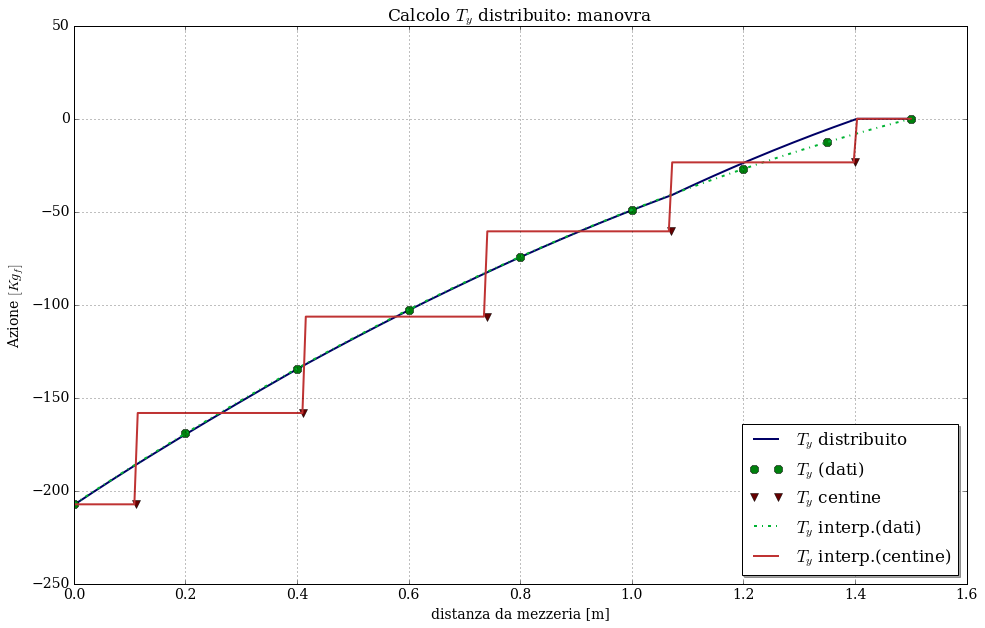

In [30]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(xx,Ty_q,color=(0.0,0,0.4),lw=2.0,label=r'$T_y$ distribuito')
plt.plot(x,Ty, '8',color=(0.0,0.5,0.05), ms=8, label=r'$T_y$ (dati)')
plt.plot(xc,Tyc, 'v',color=(0.4,0.0,0.0), ms=8,label=r'$T_y$ centine')
plt.plot(xx,Ty1,color=(0.0,0.7,0.2),lw=2.0,ls='-.',label=r'$T_y$ interp.(dati)')
plt.plot(xx,Ty1c,color=(0.75,0.2,0.2),lw=2.0,label=r'$T_y$ interp.(centine)')
plt.title(r'Calcolo $T_y$ distribuito: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f]$')
plt.grid()
plt.legend(loc='lower right', shadow=True);
plt.savefig('07_Ty_distribuito_'+tipo+'.jpg')

In [31]:
Mx_q = np.zeros_like(xx)

for i in range(1,len(Mx_q)):
    Mx_q[i] = np.trapz(Ty_q[:i],xx[:i])

Mx_q = Mx_q[-1] - Mx_q

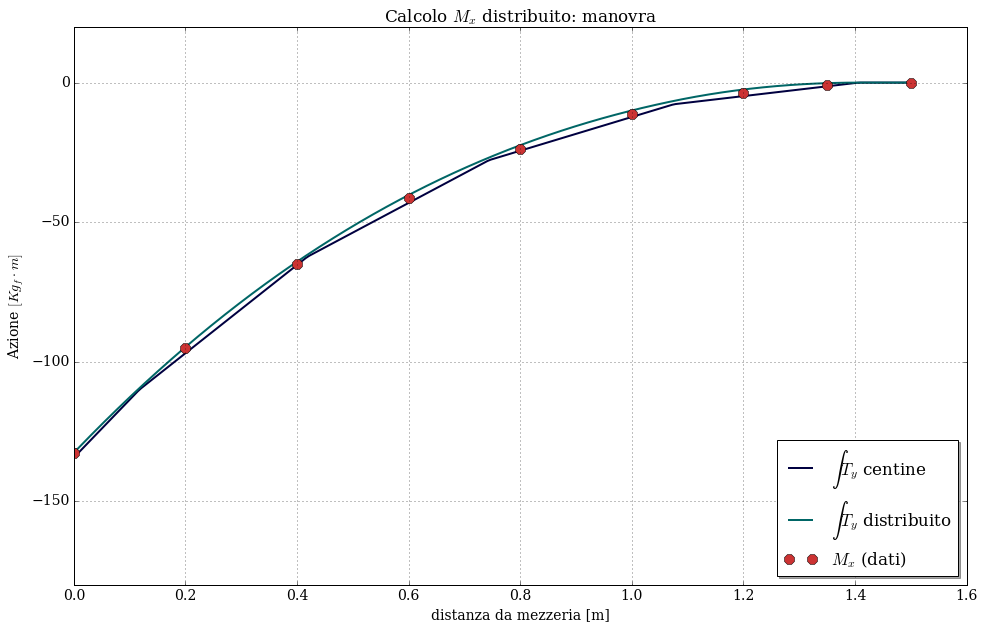

In [32]:
plt.figure(figsize=(16,10), dpi=300)
#plt.plot(xx,Ty1,label=r'$T_y$ interp')
plt.plot(xx,intTyc,color=(0.0,0.0,0.25),lw=2.0,label=r'$\int T_y$ centine')
plt.plot(xx,Mx_q,color=(0.0,0.4,0.4),lw=2.0,label=r'$\int T_y$ distribuito')
plt.plot(x,Mx, '8', color=(0.8,0.2,0.2), ms=10,label=r'$M_x$ (dati)')
plt.title(r'Calcolo $M_x$ distribuito: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f \cdot m]$')
plt.legend(loc='lower right', shadow=True)
plt.grid()
plt.ylim((-180,20));
plt.savefig('08_Mx_distrib_'+tipo+'.jpg')

In [33]:
qmz = np.zeros(3)

In [34]:
for i in range(3):
    if i<2:
        qmz[i] = (fMz(xc_ext[i])-fMz(xc_ext[i+1]))/((ms_h[i+1]+ms_h[i])*(xc_ext[i+1]-xc_ext[i])*.5*.345)
    else:
        qmz[i] = (fMz(xc_ext[i]))/((ms_h[i+1]+ms_h[i])*(xc_ext[i+1]-xc_ext[i])*.5*.345)

In [35]:
qmz

array([ 1.39994591,  1.27393216,  2.3426247 ])

In [36]:
Mz_q = np.zeros_like(xx)

for i in range(1,len(xx)):
    sect = sum(xx[-i-1] >= xc)
    if sect >= 3:
        DeltaMz = 0.
    else:
        b1 = ms_h[sect]
        b2 = ms_h[sect+1]
        h = xc_ext[sect+1] - xc_ext[sect]
        xa = xx[-i-1] - xc_ext[sect]
        xb = xx[-i] - xc_ext[sect]
        ya = (b2-b1)/h*xa+b1
        yb = (b2-b1)/h*xb+b1
        DeltaMz = (ya+yb)*(xb-xa)*0.5*qmz[sect]*.345
        
    Mz_q[-i-1] = Mz_q[-i] + DeltaMz 

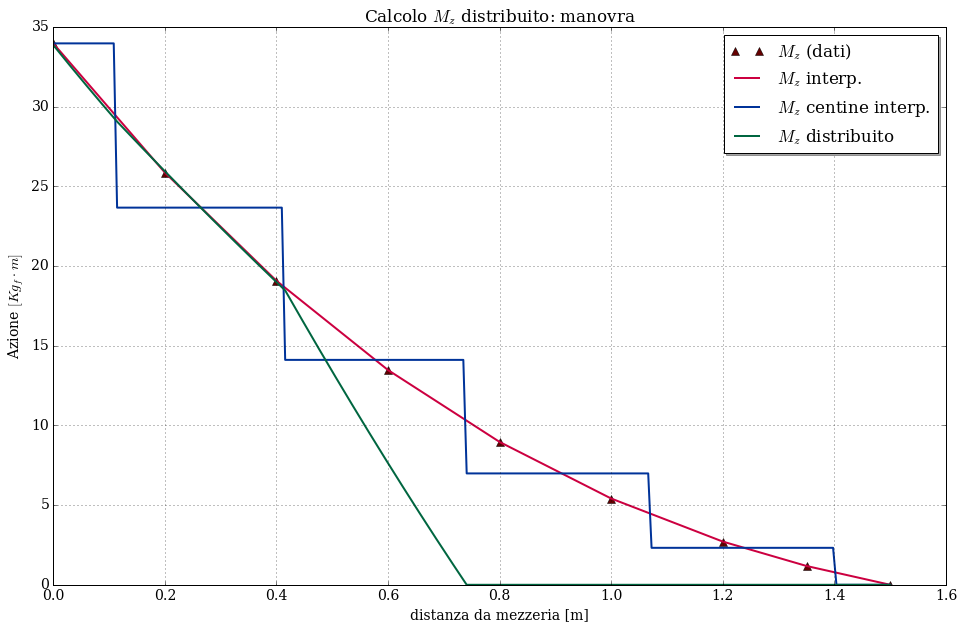

In [37]:
plt.figure(figsize=(16,10), dpi=300)
plt.plot(x,Mz,'^',color=(0.4,0,0), ms=8,label=r'$M_z$ (dati)')
plt.plot(x,Mz,color=(0.8,0.0,0.25), lw=2.0,label=r'$M_z$ interp.')
plt.plot(xx,Mz1c, color=(0.,0.2,0.6),lw= 2.0,label=r'$M_z$ centine interp.')
plt.plot(xx,Mz_q, color=(0.,0.4,0.25), lw= 2.0, label=r'$M_z$ distribuito')
#plt.plot(xc,Tyc, '8', ms=8,label=r'T centine')
#plt.plot(x,Mx, '8', ms=8,label=r'$M_x$')
plt.title(r'Calcolo $M_z$ distribuito: '+tipo)
plt.xlabel(r'distanza da mezzeria [m]')
plt.ylabel(r'Azione $[Kg_f \cdot m]$')
plt.grid()
plt.legend(loc='upper right', shadow=True);
plt.savefig('09_Mz_distrib_'+tipo+'.jpg')

# Reazione vincolare

In [38]:
print "Taglio nell'origine: "+tipo
print "Dati: "+str(Ty[0]*9.81)+" [N]"
print "Centine: "+str(Ty1c[0]*9.81)+" [N]"
print "Distribuito: "+str(Ty_q[0]*9.81)+" [N]"

Taglio nell'origine: manovra
Dati: -2033.3187 [N]
Centine: -2033.3187 [N]
Distribuito: -2036.59420576 [N]


In [39]:
print "Momento flettente nell'origine: "+tipo
print "Dati: "+str(Mx[0]*9.81*1000.)+" [Nmm]"
print "Centine: "+str(intTyc[0]*9.81*1000.)+" [Nmm]"
print "Distribuito: "+str(Mx_q[0]*9.81*1000.)+" [Nmm]"

Momento flettente nell'origine: manovra
Dati: -1302434.46 [Nmm]
Centine: -1306150.64489 [Nmm]
Distribuito: -1289264.48499 [Nmm]


In [40]:
print "Momento flettente nell'origine: "+tipo
print "Dati: "+str(Mz[0]*9.81*1000.)+" [Nmm]"
print "Centine: "+str(Mz1c[0]*9.81*1000.)+" [Nmm]"
print "Distribuito: "+str(Mz_q[0]*9.81*1000.)+" [Nmm]"

Momento flettente nell'origine: manovra
Dati: 333147.6 [Nmm]
Centine: 333147.6 [Nmm]
Distribuito: 332170.010557 [Nmm]
